In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import plot_model 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
x_train = x_train / 255.0 
x_test = x_test / 255.0 

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) 

In [4]:
for layer in vgg_base.layers: 
 layer.trainable = False 


In [5]:
model = Sequential() 
model.add(vgg_base) 
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax')) 

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
 loss='sparse_categorical_crossentropy', 
 metrics=['accuracy']) 


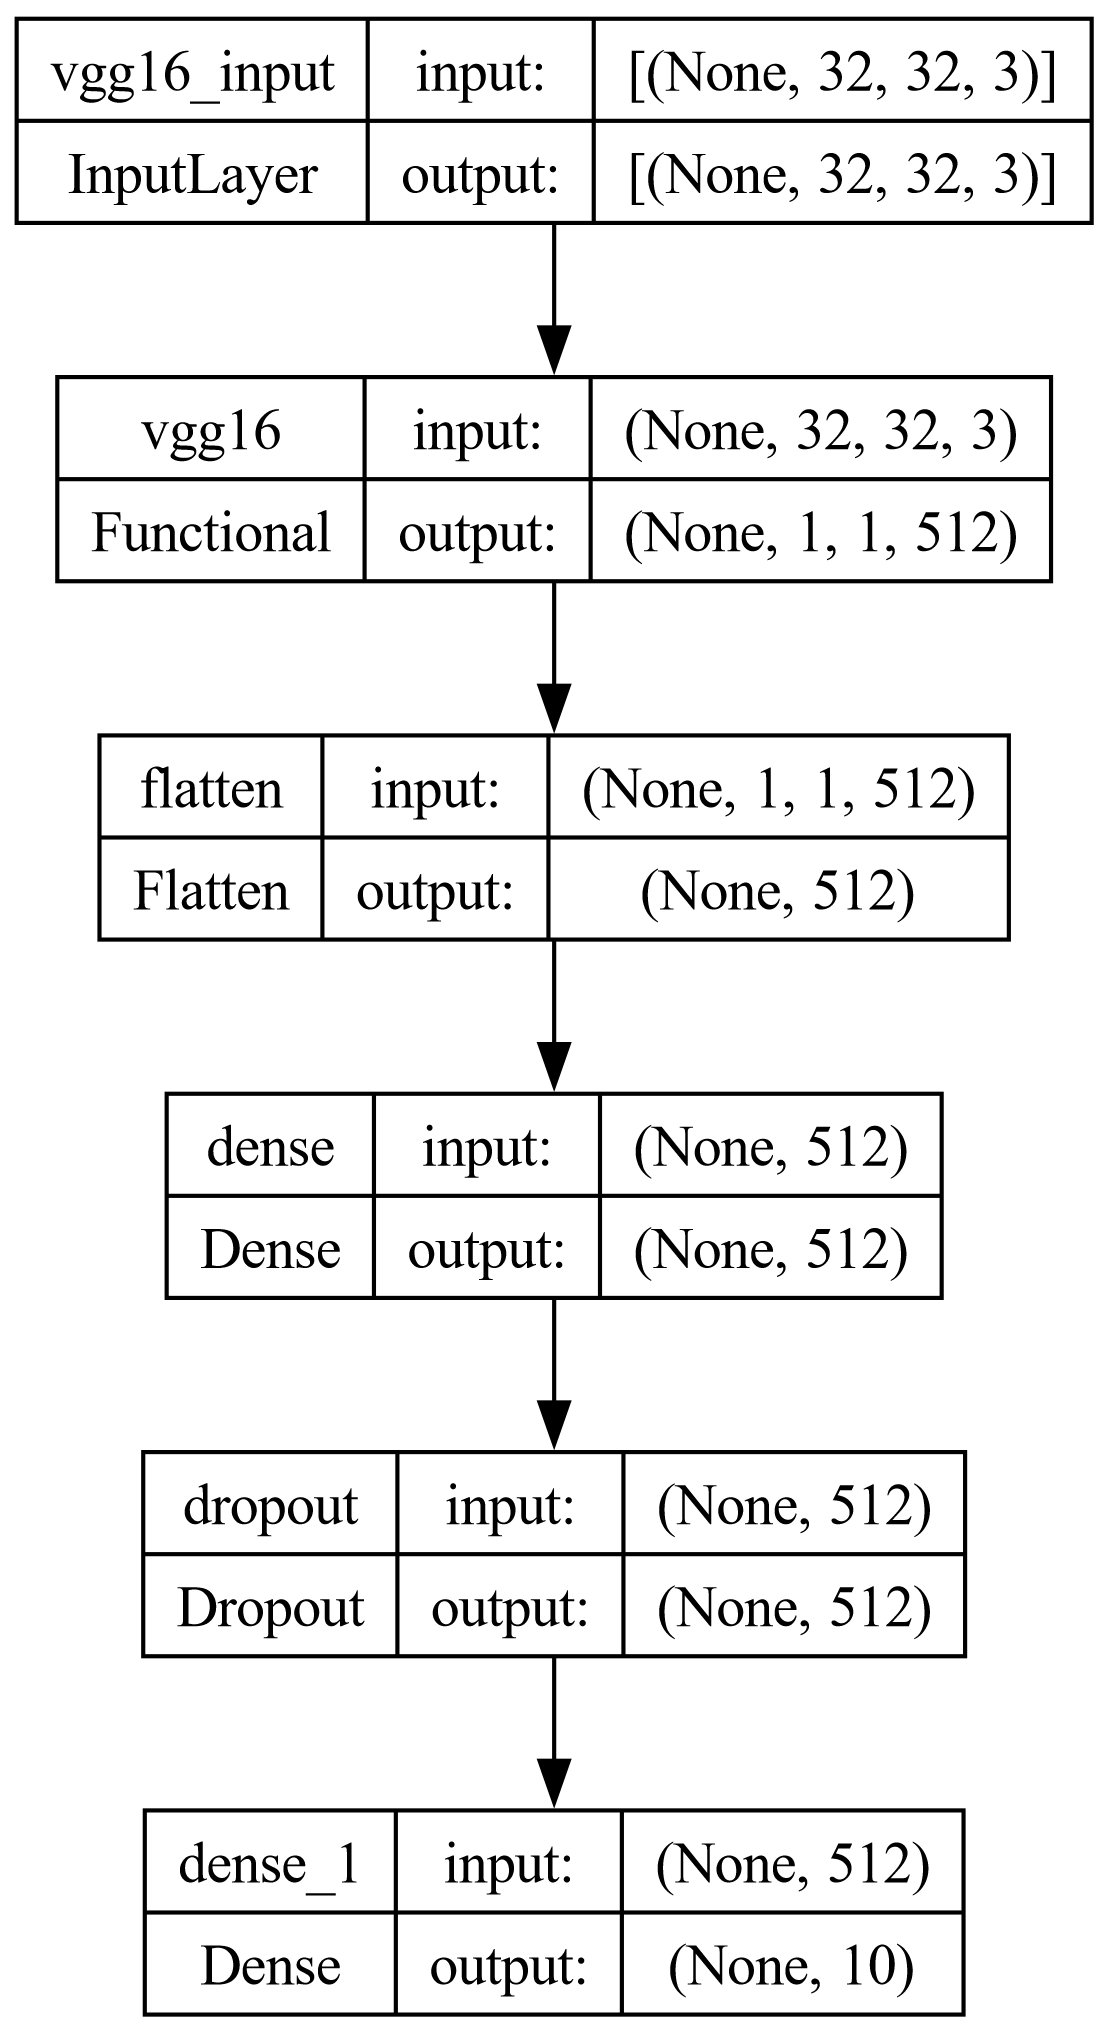

In [7]:
plot_model(model, to_file='cnn.png', show_shapes=True, 
 show_layer_names=True, dpi=300) 


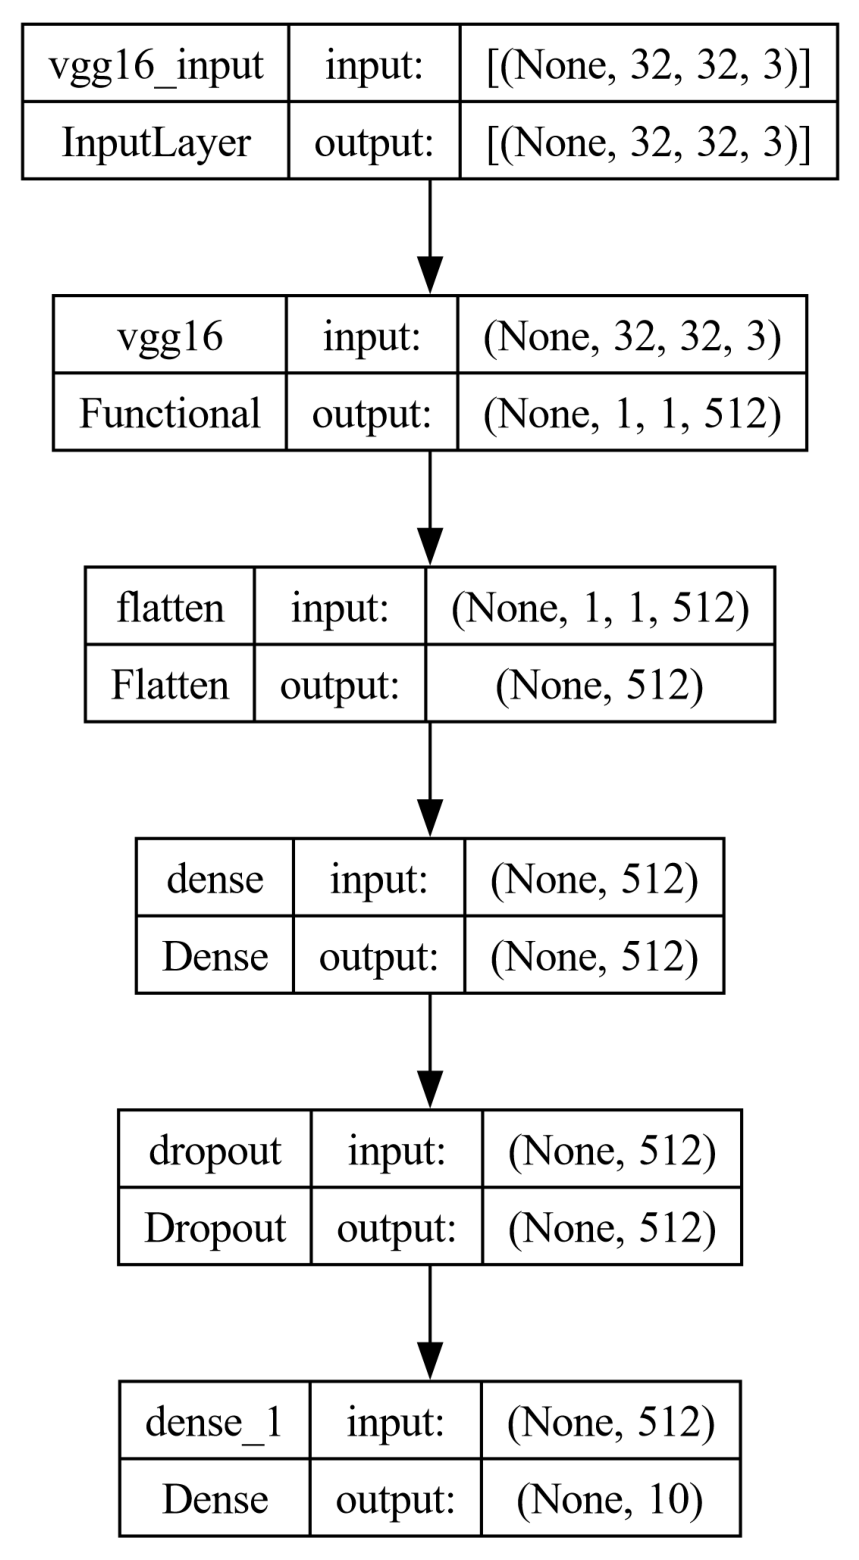

In [8]:
plt.figure(figsize=(20, 20)) 
img = plt.imread('cnn.png') 
plt.imshow(img) 
plt.axis('off') 
plt.show() 


In [9]:
history = model.fit(x_train, y_train, 
 epochs=10, 
 batch_size=32, 
 validation_split=0.2) 


Epoch 1/10
1250/1250 [==============================] - 231s 182ms/step - loss: 1.7748 - accuracy: 0.3727 - val_loss: 1.4674 - val_accuracy: 0.4959
Epoch 2/10
1250/1250 [==============================] - 193s 154ms/step - loss: 1.4665 - accuracy: 0.4920 - val_loss: 1.3556 - val_accuracy: 0.5322
Epoch 3/10
1250/1250 [==============================] - 187s 150ms/step - loss: 1.3733 - accuracy: 0.5264 - val_loss: 1.2966 - val_accuracy: 0.5512
Epoch 4/10
1250/1250 [==============================] - 189s 151ms/step - loss: 1.3197 - accuracy: 0.5386 - val_loss: 1.2610 - val_accuracy: 0.5621
Epoch 5/10
1250/1250 [==============================] - 191s 153ms/step - loss: 1.2777 - accuracy: 0.5551 - val_loss: 1.2352 - val_accuracy: 0.5739
Epoch 6/10
1250/1250 [==============================] - 190s 152ms/step - loss: 1.2474 - accuracy: 0.5683 - val_loss: 1.2154 - val_accuracy: 0.5759
Epoch 7/10
1250/1250 [==============================] - 187s 150ms/step - loss: 1.2269 - accuracy: 0.5741 - val_

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test) 
print(f'Test Loss: {test_loss:.4f}') 
print(f'Test Accuracy: {test_acc * 100:.2f}%') 


313/313 [==============================] - 40s 128ms/step - loss: 1.1827 - accuracy: 0.5839
Test Loss: 1.1827
Test Accuracy: 58.39%


In [11]:
plt.figure(figsize=(12, 5)) 

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

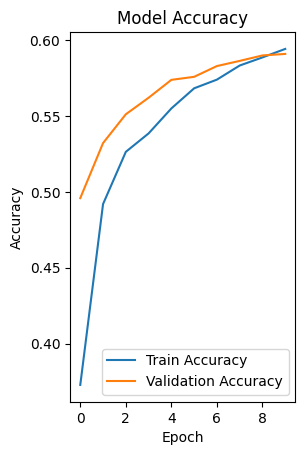

In [12]:
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.legend() 


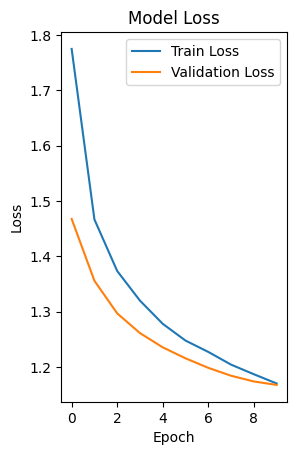

In [13]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Model Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 


In [14]:
plt.tight_layout() 
plt.show() 


<Figure size 640x480 with 0 Axes>

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',  'dog', 'frog', 'horse', 'ship', 'truck'] 

In [22]:
index=int(input("Enter an index:"))

Enter an index:30


In [23]:
sample = x_test[index].reshape(1, 32, 32, 3) 
prediction = model.predict(sample) 
predicted_class = class_names[np.argmax(prediction)] 


1/1 [==============================] - 0s 37ms/step


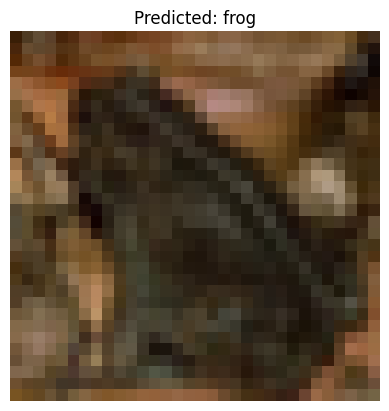

In [24]:
plt.imshow(x_test[index]) 
plt.title(f"Predicted: {predicted_class}") 
plt.axis('off') 
plt.show()
